<a href="https://colab.research.google.com/github/felipefreitasbr/quarentena-de-dados/blob/master/Aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#Desafio 1

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [88]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

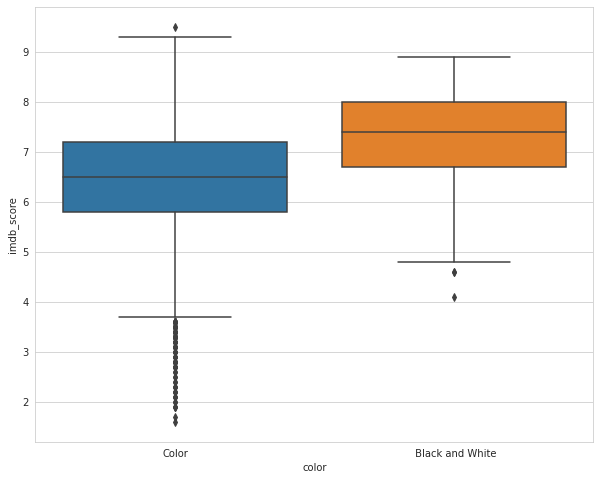

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize =(10,8))
sns.boxplot(data = imdb[['color', 'imdb_score']].dropna(), x='color', y='imdb_score')

In [90]:
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [91]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [92]:
imdb.groupby('color').describe()['imdb_score']

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
Black and White,209.0,7.227273,0.907380,4.1,6.7,7.4,8.0,8.9
Color,4815.0,6.409533,1.119593,1.6,5.8,6.5,7.2,9.5


Os filmes preto e branco tendem a ser melhor avaliados, mas como mencionado na aula, pode haver um viés "cult" na avaliação dos filmes.
O fato de haver 23x mais filmes coloridos na base de dados também pode colaborar para a maior dispersão desse tipo de filmes.

#Desafio 2

No gráfico de budget por lucro temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [93]:
imdb = imdb.drop_duplicates()
imdb_usa = imdb.query('country == "USA"')
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Piratas do Caribe: No fim do mundo (2007) é o filme americano com maior orçamento na nossa base de dados, estimado em 300 milhões de dólares.

In [94]:
budget_gross = imdb_usa[['budget', 'gross']].dropna()
budget_gross.shape

(3047, 2)

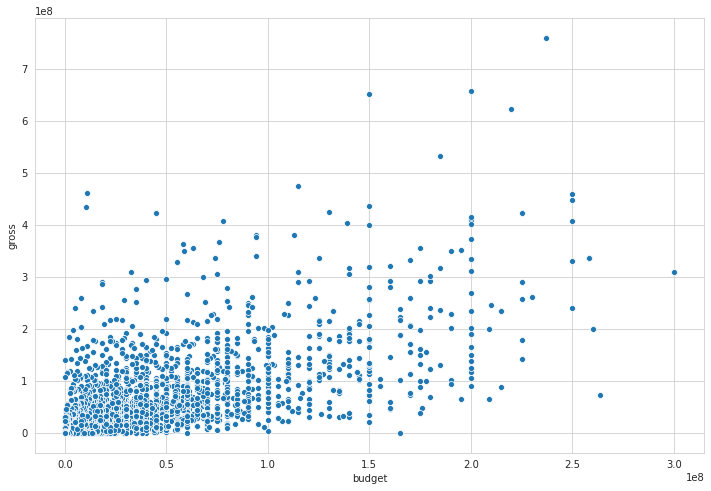

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'budget', y = 'gross', data = budget_gross)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


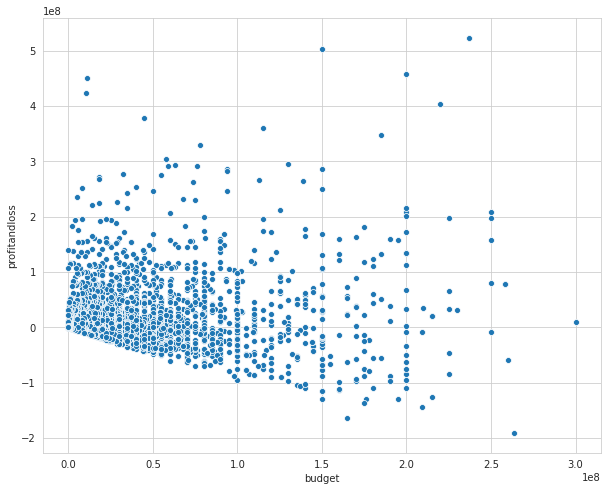

In [96]:
#Adicionando a coluna 'profitandloss' ao data frame imdb_usa
imdb_usa['profitandloss'] = imdb_usa['gross'] - imdb_usa['budget']

budget_profitandloss = imdb_usa[['budget',  'profitandloss']].dropna()

plt.figure(figsize=(10,8))
sns.scatterplot(data=budget_profitandloss, x='budget', y='profitandloss')

In [97]:
imdb_usa['profitandloss'].min()

-190641321.0

In [98]:
imdb_usa.sort_values('profitandloss').head(1)['movie_title']

5    John Carter 
Name: movie_title, dtype: object

O filme com maior prejuízo em nossa base de dados é 'John Carter', com $190.641.321 negativos.

#Desafio 3

Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

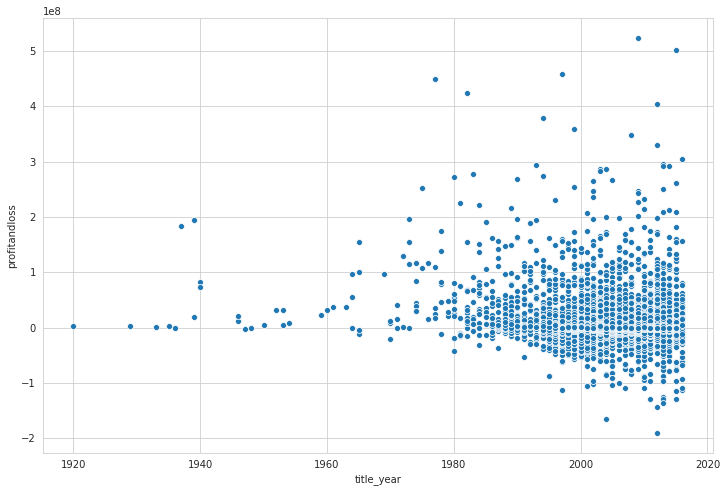

In [99]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = imdb_usa, x='title_year', y='profitandloss')

In [0]:
filmes_por_ano = imdb_usa.groupby('title_year').count()['movie_title']
filmes_por_ano = filmes_por_ano.reset_index()
filmes_por_ano['title_year'] = filmes_por_ano.title_year.astype(int)

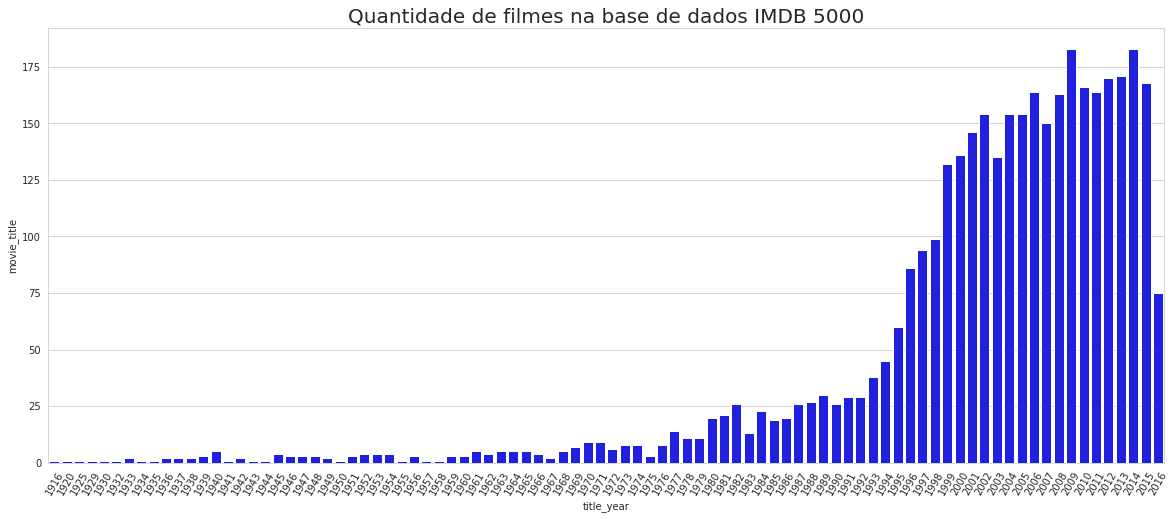

In [101]:
plt.figure(figsize=(20,8))
sns.barplot(x='title_year', y='movie_title', data=filmes_por_ano, color='Blue')
plt.xticks(rotation = 60)
plt.title('Quantidade de filmes na base de dados IMDB 5000', fontsize = 20)
plt.show()

O gráfico de dispersão realmente parece indicar maior ocorrência de filmes com prejuízo recentemente, porém dado que há poucos filmes antigos na base, acredito que há um viés que nos impede de fazer tal afirmação. Também seria importante entender como é calculado/reportado o faturamento na base de dados do IMDB, para ter mais segurança acerca da confiabilidade desses dados.

#Desafio 4

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro?

In [102]:
imdb_usa.query('title_year < 1945').sort_values('profitandloss', ascending=False).head()[['movie_title', 'title_year','profitandloss']]

,movie_title,title_year,profitandloss
3970,Gone with the Wind,1939.0,194678278.0
4449,Snow White and the Seven Dwarfs,1937.0,182925485.0
1143,Pinocchio,1940.0,81700000.0
4225,Fantasia,1940.0,74120000.0
4157,The Wizard of Oz,1939.0,19402612.0


#Desafio 5

No gráfico de filmes_irmaos por dindin temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [103]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
filmes_por_diretor.head()

Steven Spielberg    24
Clint Eastwood      20
Martin Scorsese     20
Woody Allen         18
Tim Burton          16
Name: director_name, dtype: int64

In [0]:
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["gross", "titles"]
gross_director = gross_director.reset_index()

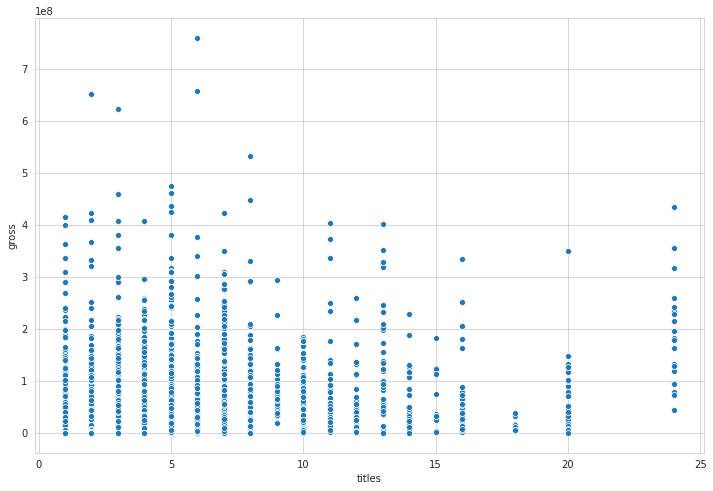

In [114]:
plt.figure(figsize = (12,8))
sns.scatterplot(x="titles", y="gross", data = gross_director)

In [115]:
gross_director.query('titles == 18')

,director_name,gross,titles
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


In [111]:
directors_gross_ranking = imdb_usa.groupby('director_name').sum()['gross']
directors_gross_ranking.sort_values(ascending=False)

director_name
Steven Spielberg       4.014062e+09
Michael Bay            2.231243e+09
Tim Burton             2.071275e+09
Sam Raimi              2.014601e+09
James Cameron          1.909726e+09
                           ...     
Jennifer Finnigan      0.000000e+00
Jerome Elston Scott    0.000000e+00
Jerry Belson           0.000000e+00
Jerry Dugan            0.000000e+00
A. Raven Cruz          0.000000e+00
Name: gross, Length: 1812, dtype: float64

#Desafio 6

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

#Desafio 7

Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
movies_from_2000_on = imdb_usa.query('title_year >= 2000')

In [118]:
movies_from_2000_on.dropna()[['gross', 'budget', 'profitandloss']].corr()

,gross,budget,profitandloss
gross,1.000000,0.703718,0.772080
budget,0.703718,1.000000,0.091799
profitandloss,0.772080,0.091799,1.000000


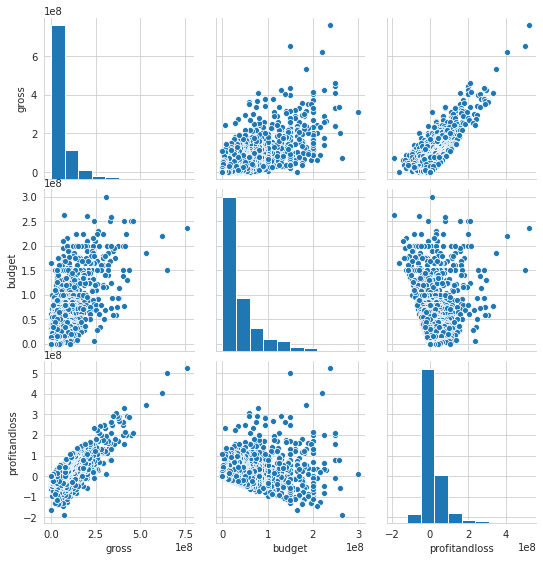

In [119]:
sns.pairplot(data = movies_from_2000_on[['gross', 'budget', 'profitandloss']])

#Desafio 8

Plotar uma reta de regressão.

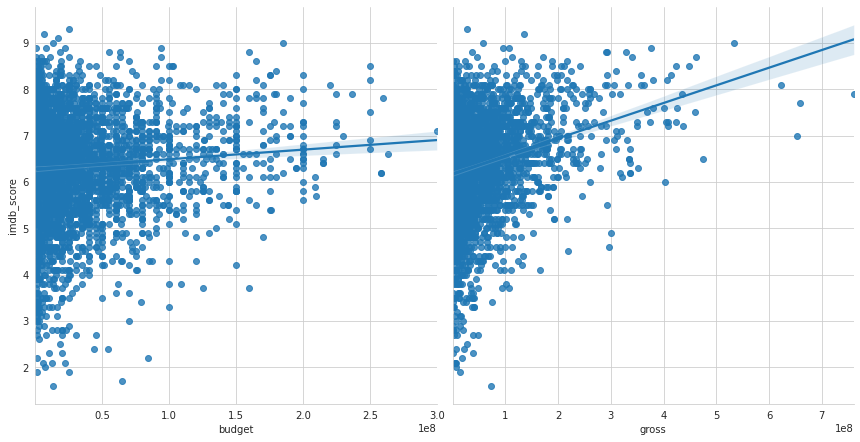

In [120]:
sns.pairplot(imdb_usa, y_vars='imdb_score', x_vars=['budget', 'gross'], height=6, kind='reg')